In [2]:
from fastai.vision.all import *
path = Path('/root/Documents/images')

In [3]:
(path).ls()

(#144) [Path('/root/Documents/images/Amblyglyphidodon aureus'),Path('/root/Documents/images/Carassius auratus'),Path('/root/Documents/images/Abudefduf vaigiensis'),Path('/root/Documents/images/Cyprinella lutrensis'),Path('/root/Documents/images/Luxilus cornutus'),Path('/root/Documents/images/Chrysiptera taupou'),Path('/root/Documents/images/Phoxinus phoxinus'),Path('/root/Documents/images/Abudefduf sexfasciatus'),Path('/root/Documents/images/Notropis hudsonius'),Path('/root/Documents/images/Hesperoleucus symmetricus')...]

In [9]:
df_path = Path('/root/Documents/')
df = pd.read_csv(df_path/"families_3.csv")

In [10]:
fishes = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 splitter=ColSplitter(),
                 get_x = ColReader(5, pref=path),
                 get_y=ColReader(1),
                 item_tfms=RandomResizedCrop(336, min_scale=0.5),
                 batch_tfms=aug_transforms())
dls = fishes.dataloaders(df)

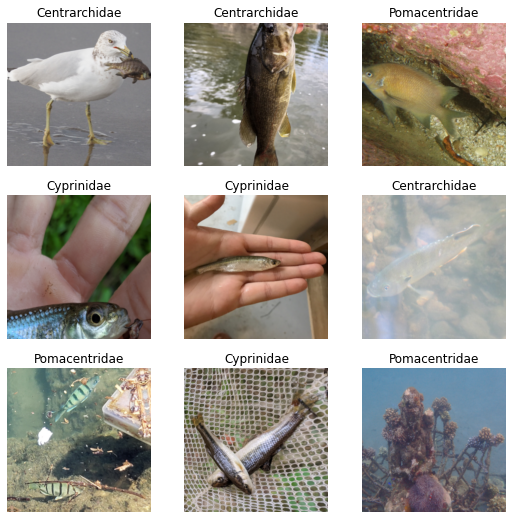

In [11]:
dls.show_batch(nrows=3, ncols=3)

In [12]:
fishes.summary(df)

Setting-up type transforms pipelines
0      Cypriniformes     Cyprinidae   Xenocyprinae  Hypophthalmichthys   
1        Perciformes  Pomacentridae  Pomacentrinae           Dascyllus   
2        Perciformes  Centrarchidae            NaN         Micropterus   
3      Cypriniformes     Cyprinidae     Cyprininae            Cyprinus   
4        Perciformes  Pomacentridae  Pomacentrinae           Abudefduf   
...              ...            ...            ...                 ...   
86383  Cypriniformes     Cyprinidae     Gobioninae       Pseudorasbora   
86384  Cypriniformes     Cyprinidae  Ex-danioninae           Parazacco   
86385    Perciformes  Centrarchidae            NaN         Micropterus   
86386    Perciformes  Centrarchidae            NaN             Lepomis   
86387    Perciformes  Pomacentridae  Pomacentrinae           Abudefduf   

                            Specie                                     fname  \
0      Hypophthalmichthys molitrix  Hypophthalmichthys molitrix/3545

In [13]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(1, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.194623,0.162891,0.065459,07:22


In [14]:
learn.unfreeze()

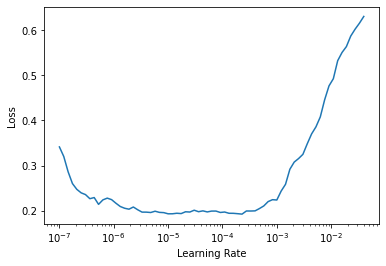

In [15]:
lr_min, lr_steep = learn.lr_find()

In [16]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 2.29e-05, steepest point: 9.12e-07


In [17]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.168130,0.141387,0.056546,07:21
1,0.143484,0.114655,0.045607,07:24
2,0.113505,0.101354,0.039472,07:22
3,0.111100,0.094820,0.036289,07:24
4,0.091465,0.090898,0.035826,07:23
5,0.092152,0.091159,0.034958,07:25


In [18]:
learn.export('families3-resnet34-6epochs.pkl')

In [19]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fit_one_cycle(1, 3e-3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.158727,0.125958,0.050295,07:51


In [20]:
learn.unfreeze()

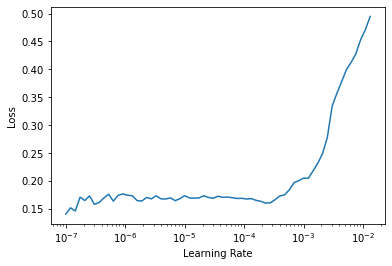

In [22]:
lr_min, lr_steep = learn.lr_find()

In [23]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 2.29e-05, steepest point: 1.32e-06


In [24]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.130665,0.116148,0.045665,09:41
1,0.113943,0.096269,0.037504,09:40
2,0.096292,0.087989,0.034842,09:41
3,0.078319,0.080723,0.031369,09:40
4,0.065900,0.077140,0.028939,09:41
5,0.070865,0.077015,0.029054,09:41


In [25]:
learn.export('families3-resnet50-6epochs.pkl')